# CMOS Leakage Power Prediction Project

This project aims to use machine learning to predict leakage power in CMOS circuits based on several circuit parameters.

---

## Steps
1. Import necessary libraries
2. Load and preprocess data
3. Define and train multiple models
4. Evaluate model performance
5. Visualize results
6. Select and save the best model


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Load and Preprocess Data

In [11]:
# Load the dataset
df = pd.read_csv('cmos_circuit_leakage_data.csv')

# Separate features and target variable
X = df.drop('leakage_power (W)', axis=1)
y = df['leakage_power (W)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define and Train Models

In [12]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {'MAE': mae, 'RMSE': rmse}  # Store results

### Display Model Performance

Model Performance:
                                MAE      RMSE
Linear Regression         0.001030  0.001418
Random Forest             0.000476  0.000736
Support Vector Regressor  0.009740  0.010051
Gradient Boosting         0.000512  0.000764


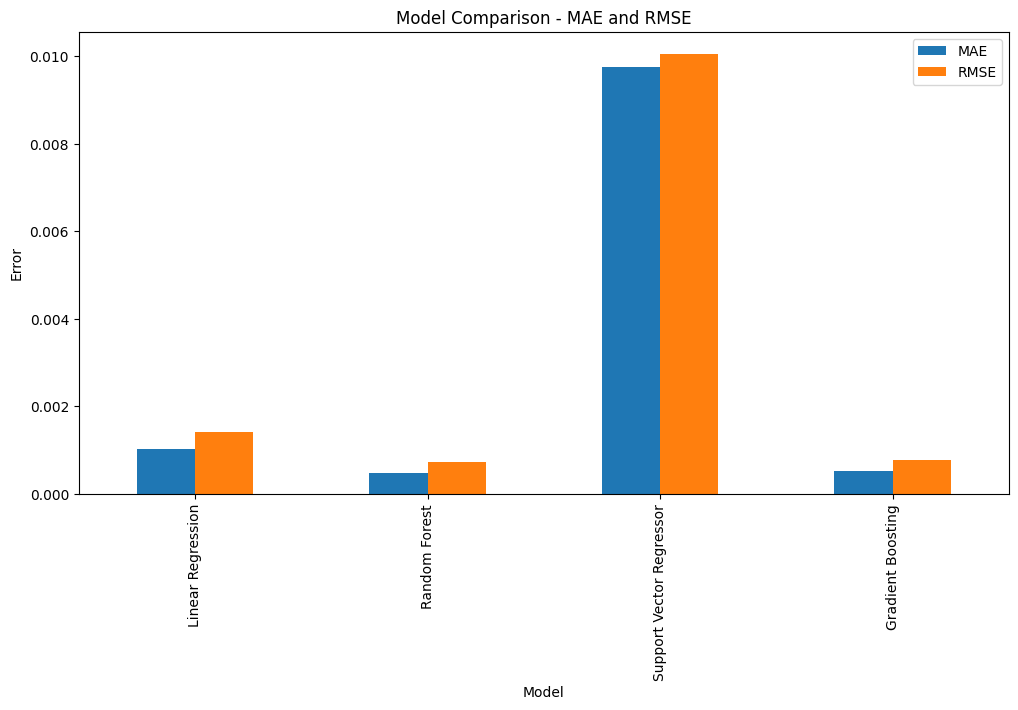

In [13]:
# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print('Model Performance:\n', results_df)

# Plot results for comparison
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison - MAE and RMSE')
plt.xlabel('Model')
plt.ylabel('Error')
plt.show()

### Select and Save the Best Model

In [14]:
# Identify the best model based on RMSE
best_model_name = results_df['RMSE'].idxmin()
best_model = models[best_model_name]

print(f"The best model is {best_model_name} with RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f}")

# Save the best model
joblib.dump(best_model, f'{best_model_name}_leakage_power_predictor.pkl')


The best model is Random Forest with RMSE: 0.0007


['Random Forest_leakage_power_predictor.pkl']

### Feature Importance (If Random Forest is Best Model)

<ipython-input-15-f44be016241b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


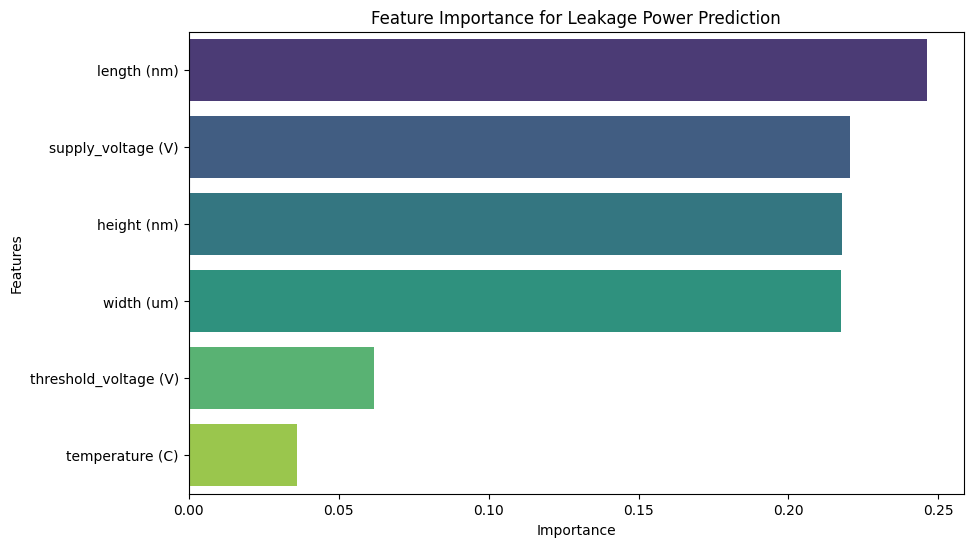

In [15]:
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance for Leakage Power Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

### Predicted vs Actual Values Scatter Plot

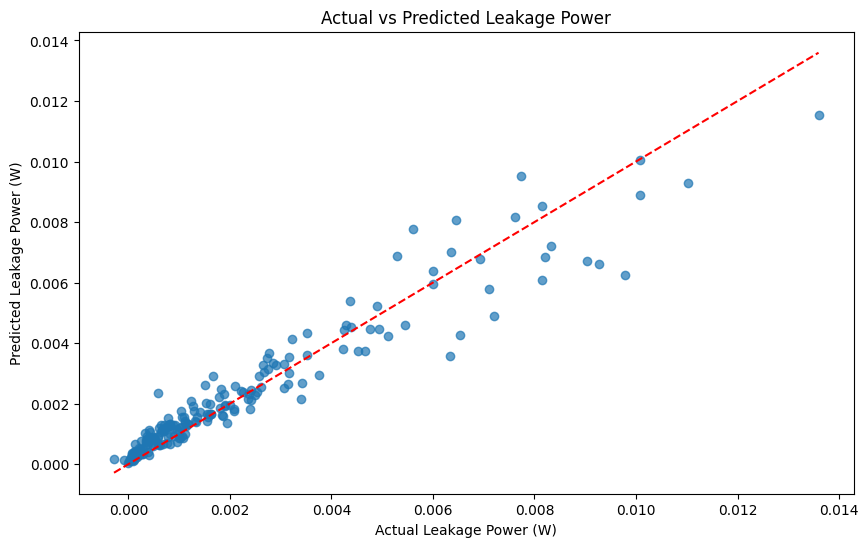

In [16]:
y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Leakage Power (W)')
plt.ylabel('Predicted Leakage Power (W)')
plt.title('Actual vs Predicted Leakage Power')
plt.show()

### Residual Plot

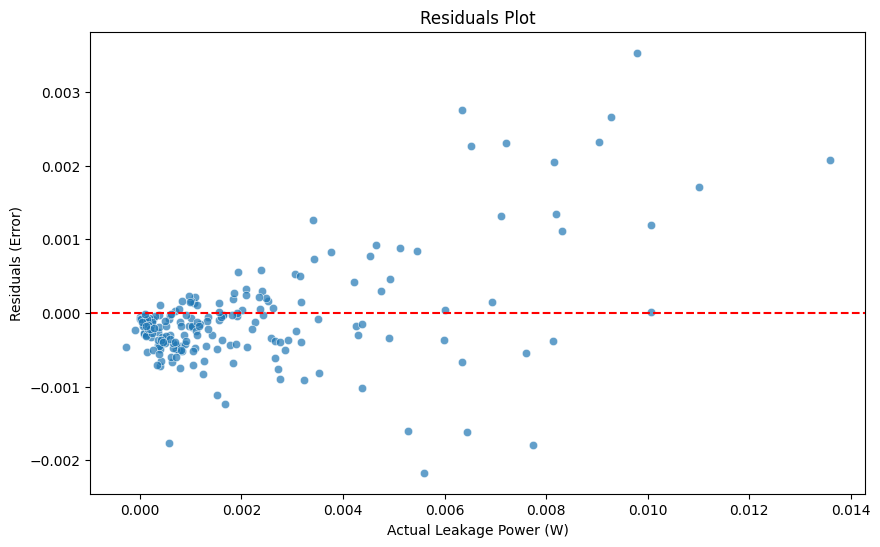

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Leakage Power (W)')
plt.ylabel('Residuals (Error)')
plt.title('Residuals Plot')
plt.show()

### Error Distribution Histogram

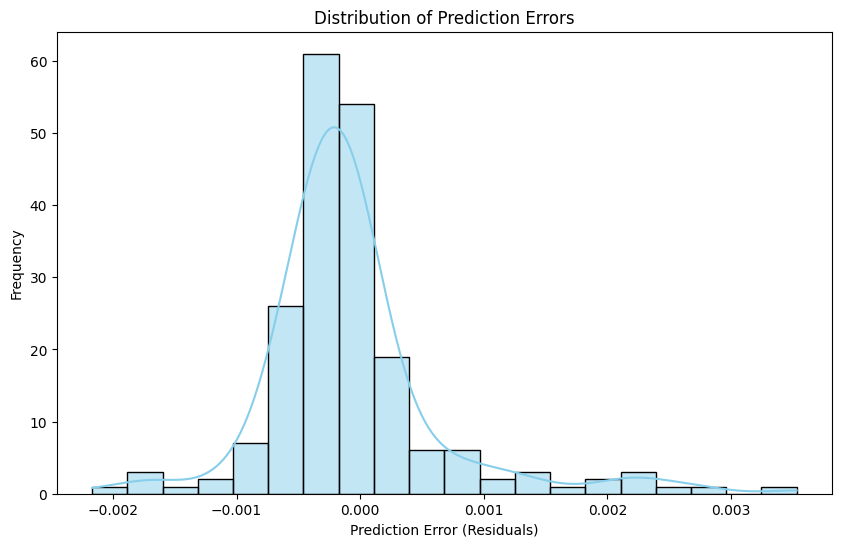

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='skyblue')
plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()